## Scientific Computing with Python: Getting familiar with ```numpy```, ```scipy``` and ```scikit-learn``` for data analysis.

### Exercise 1: Manipulating an image with ```scikit-image```

Load the Immunohistochemistry (IHC) example image stored in `im_path`. We are going to try and extract the blue-stained cell nuclei and then perform a crude binary segmentation on them. This is a very typical problem in cell biology image processing.

We have included all the required imports from `skimage` that you should need. The steps are as follows:

1. Perform a color unmixing to get the Haematoxylin-Eosin-DAB (HED) channels, and store the image containing the nuclei in a variable.
1. Do a gaussian blurring to ensure smooth boundaries for our segmentation.
1. Apply an Otsu threshold to segment based on the image intensities, producing a binary image. You will need to use some [comparison operator](https://www.w3schools.com/python/gloss_python_comparison_operators.asp), can you guess which one?
1. Plot your final `nuclei_mask` using `pyplot`.

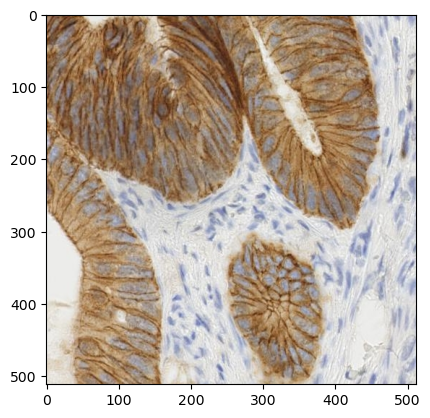

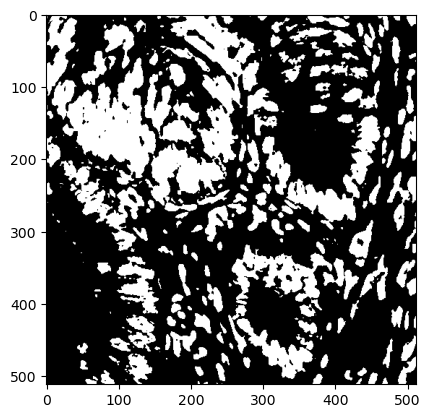

In [3]:
im_path = "../datasets/images/ihc.png"

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2hed
from skimage.filters import gaussian, threshold_otsu

# load the image using the appropriate function. call it "im"
im = imread(im_path)

# --- uncomment the following line of code to plot ---
plt.imshow(im)
# ----------------------------------------------------

# perform RGB to Haematoxylin-Eosin-DAB (HED) color unmixing
hed = rgb2hed(im)

# take only the nuclei channel and store it in a variable "nuclei"
nuclei = hed[:, :, 0]
# blur the nuclei
nuclei_blurred = gaussian(nuclei, sigma=1)

# apply an otsu threshold to create a binary mask. call the binary image "nuclei_mask"
nuclei_mask = nuclei_blurred > threshold_otsu(nuclei_blurred)

# --- uncomment to plot ---
plt.figure()
plt.imshow(nuclei_mask, cmap='gray')
# -------------------------

### Exercise 2: Statistical analysis with `scipy`

Here we have loaded the <b>Iris dataset</b> from <a href="https://scikit-learn.org/1.5/datasets/toy_dataset.html">scikit-learn</a>. The data is loaded in a machine-learning friendly format: ```pd.DataFrame```. We view the first few entries using ```df.head()```. You will use this data to explore the power of `scipy` for statistical analysis.

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# load the data
iris = load_iris(as_frame=True)

X = iris['data']
y = iris['target']
# one-hot encode
y = pd.get_dummies(y)

display(X.head())
display(y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


##### Exercise 2.1: Summarize your data statistics.

Use either ```numpy```, ```scipy``` or ```pandas``` to statistically summarize the classes in your data by computing the `mean` and `standard deviation`. Do it for all features, if there is more than one. Summarize the results in a ```pd.DataFrame```.

In [16]:
means = []
stds = []

# here, write some code to take the .mean and .std of all of your X data
# store in "means" and "stds"
for col in X.columns:
    means.append(X[col].mean())
    stds.append(X[col].std())

# means
display(pd.DataFrame(means, index = list(X.columns) , columns =['Mean']) )

# standard deviations
display(pd.DataFrame(stds, index = list(X.columns), columns =['Standard Deviation']) )

,Mean
sepal length (cm),5.843333
sepal width (cm),3.057333
petal length (cm),3.758000
petal width (cm),1.199333


,Standard Deviation
sepal length (cm),0.828066
sepal width (cm),0.435866
petal length (cm),1.765298
petal width (cm),0.762238


In [19]:
print(X.columns)
print(y)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
         0      1      2
0     True  False  False
1     True  False  False
2     True  False  False
3     True  False  False
4     True  False  False
..     ...    ...    ...
145  False  False   True
146  False  False   True
147  False  False   True
148  False  False   True
149  False  False   True

[150 rows x 3 columns]


##### Exercise 2.2: Perform a significance test using your dataset.

Choose an interesting feature from your dataset and use ```scipy``` to perform a signicance test to determine if there is a significant difference between your classes/targets. For bonus points, select a good plot from ```seaborn``` and visualize the data.

We have chosen a test for you in the `imports`... Why did we chose this one?

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)


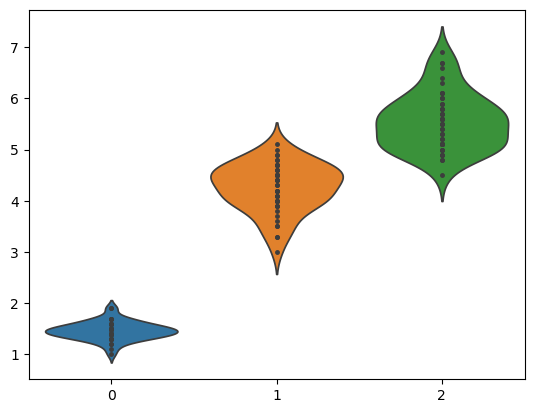

In [18]:
import seaborn as sns
from scipy.stats import f_oneway

# look at your stats to select a feature which you think could demonstrate a significant difference between flowers
feature = "petal length (cm)"

# preparing the 3 datasets to use in our test for the selected feature 
try:
    v0 = X[feature].values[y[0]]
    v1 = X[feature].values[y[1]]
    v2 = X[feature].values[y[2]]
except KeyError:
    print(f"Are you sure {feature} is a key in X?")

# plotting our data. what do you think will be the result of our test?
try:
    sns.violinplot(data=[v0, v1, v2], inner='point')
except NameError:
    pass

# perform the statistical test here:
result = f_oneway(v0, v1, v2)

print(result)